## The pancreatic $\beta$-cell

Pancreatic $\beta$-cells secrete insulin, a hormone used to maintain blood plasma glocose levels. Electrical activity and $Ca^{2+}$ concentrations have been found to be linked to insuling secretion.

The Chay-Keizer model is a system of coupled ODEs which govern the flow of ions through the cell membrane and can be used to model the electrical activity and ion concentration in pancreatic $\beta$-cells.

### Chay-Keizer model

This model used modified Morris-Lecar equations to model the rich phenomena found in pancreatic $\beta$-cells such as spiking and bursting behaviour.

$$
C_m\frac{dV}{dt} = -g_{Ca}m_{\infty}(V-V_{Ca}) - g_Kw(V-V_K) - g_L(V-V_L) - I_{K(Ca)} \\
\\
\frac{dw}{dt} = \frac{\phi (w_{\infty}- w)}{\tau} \\
\\
\frac{[Ca^{2+}]_i}{dt} = f_i(-\alpha g_{Ca}m_{\infty}(V-V_{Ca}) - v_{LPM}[Ca^{2+}]_i)

$$

The K(Ca) current from the 1st equation is of the form:

$$
I_{K(Ca)} = g_{K(Ca)}\frac{[Ca^{2+}]_i}{K_{K(Ca)}+ [Ca^{2+}]_i}(V-V_K)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from scipy import optimize
from numpy import linalg as LA

The values of the parameters used in the above ODEs is found below.

In [2]:
Cm = 5300 #fF
g_Ca = 1000 #pS
V_Ca = 25 #mV
g_K = 2700 #pS
V_K = -75 #mV
I_app = 0
v1 = -20 #mV
v2 = 24
v3 = -16 #mV
v4 = 11.2 #mV
phi = 0.035 #/ms
g_L = 150 #pS
V_L = -75 #mV
g_KCa = 2000 #pS
K_KCa = 5 #micro M
f = 0.001 
alpha = 0.0000045 #micro M /(fA * ms)


f_i = 0.004
vLPM = 0.18 #/ms

In [3]:
from Function_bank import chay_Keizer # still can't get my function import to work #help
#of course better documentation for these functions can be found in Function_bank.py


## Solving the Chay-Keizer model

Using ivp_solve to find numerical solutions for the Chay-Keizer model.

In [22]:
f_i = 0.001

vLPM = 0.18 #/ms
alpha = 4.5e-06



sol=solve_ivp(chay_Keizer, t_span=[0, 10000], y0 =[-70, 0.01, 0.1], max_step = 0.01, args=(0.001, 0.15))

print(sol.message)




The solver successfully reached the end of the integration interval.


I then plotted the time series for all 3 variables, $V$, $w$, $[Ca^{2+}]_i$. I would expect to see some bursting behaviour in the 1st graph (V vs. t) but all I get is a plateau or slow decrease of the voltage. There could be something wrong with the initial parameters that I used or a mistake in how I defined the function, however, I used the same parameter values as they used in the "Computational Cell Biology" textbook.

The third graph also isn't exhibiting the behaviour I would expect; I would expect slow oscillations of the calcium concentration, but what I see is merely a slow rise in the concentration. This behaviour doesn't change even when I increase the time scale by a factor of 10, we still only see a steady slow rise.

In summary, I do not know what is wrong with my code, any insight would be greatly appreciated.

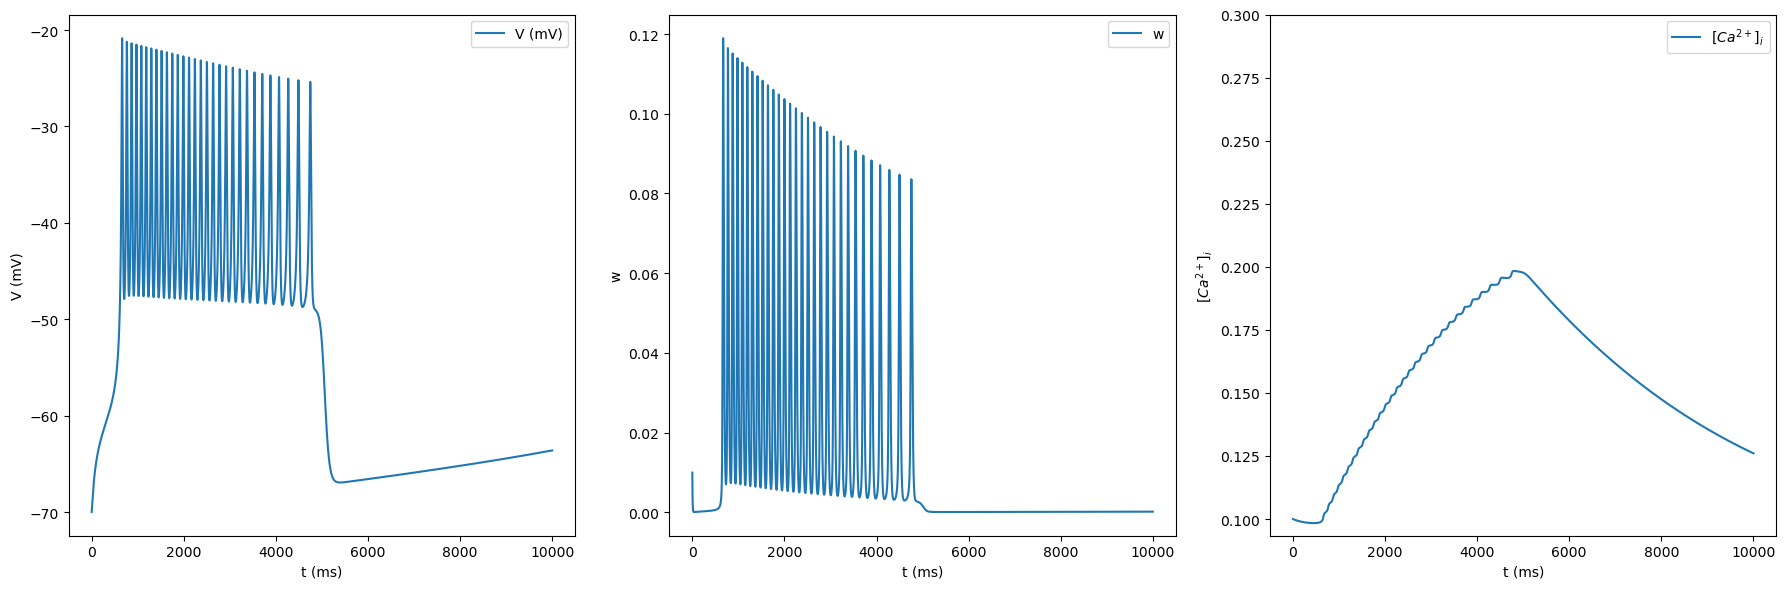

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))




ax1.plot(sol.t, sol.y[0, :], label="V (mV)")
ax1.set_xlabel("t (ms)")
ax1.set_ylabel("V (mV)")
ax1.legend()

ax2.plot(sol.t, sol.y[1, :], label="w")
ax2.set_xlabel("t (ms)")
ax2.set_ylabel("w")

ax2.legend()

ax3.plot(sol.t, sol.y[2, :], label="$[Ca^{2+}]_i$")
ax3.set_xlabel("t (ms)")
ax3.set_ylabel("$[Ca^{2+}]_i$")
plt.ylim(top = 0.3)

ax3.legend()

plt.tight_layout()
plt.show()

In [27]:
from Function_bank import CK_fsolve_Cai

length = 100
Cai = np.linspace(0, 1, length)
V = np.zeros(length)
w = np.zeros(length)

for i in range(len(Cai)):
    sol = fsolve(CK_fsolve_Cai, [1,1], args=(Cai[i],))
    V[i], w[i] = sol
    
fig, ax = plt.subplots()

ax.plot(Cai, V,)
#plt.ylim(top = 75)

plt.xlabel("Cai")
plt.ylabel("V (mV)")
plt.show()


ImportError: cannot import name 'CK_fsolve_Cai' from 'Function_bank' (c:\Users\adam\Documents\_Uni\_year3\Computing\Prototype\Function_bank.py)